In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('/data/notebooks/jupyterlab-biascorrlab/data/ProcessedData/NST_Observations.nc')
ds = ds.set_coords(("Year", "Day_of_Month"))
ds = ds.sel(Month=1)

In [3]:
ds

<xarray.Dataset>
Dimensions:        (Station_Lower: 216, Day: 1302)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
    Month          float64 1.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Year           (Station_Lower, Day) float64 ...
    Day_of_Month   (Station_Lower, Day) float64 ...
    Lat(°C)        (Station_Lower) float64 ...
    Lon(°C)        (Station_Lower) float64 ...
    Elevation(m)   (Station_Lower) float64 ...
    Institution    (Station_Lower) object ...
Data variables:
    Temperature()  (Station_Lower, Day) float64 ...

In [37]:
df = ds['Temperature()'].to_dataframe().reset_index()
da_count = df.groupby(['Station_Lower','Year']).count()['Temperature()'].to_xarray()
da_count['Station_Lower']=np.arange(0,200,1)

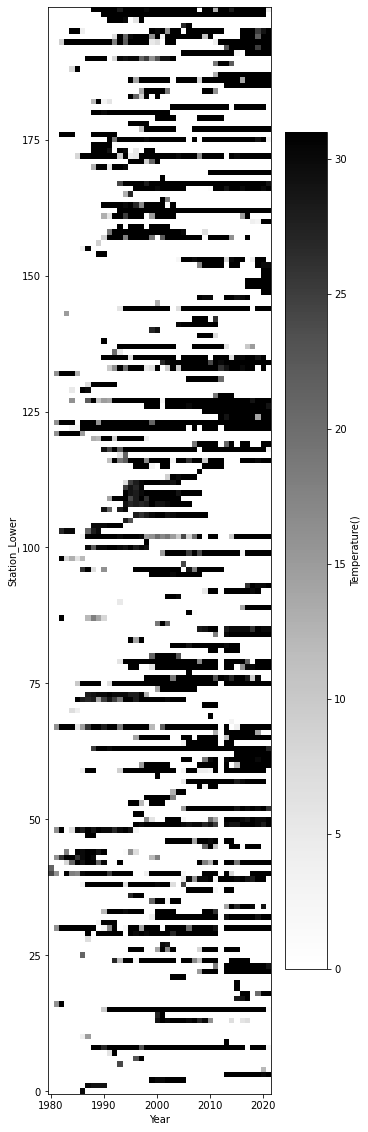

In [67]:
plt.figure(figsize=(5,20))
da_count.plot(cmap=plt.cm.Greys)

In [153]:
group = df.groupby('Station_Lower')
df_filtered = group.filter(lambda x: x.count()['Temperature()'] > 1000)

<AxesSubplot:ylabel='Density'>

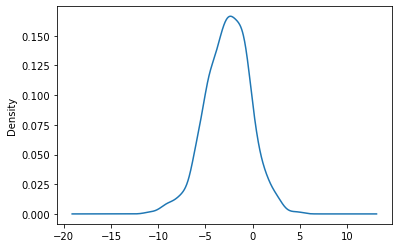

In [157]:
filtered_group = df_filtered.groupby('Station_Lower')['Temperature()']
keys = filtered_group.groups.keys()
filtered_group.get_group(list(keys)[5]).plot.kde()

In [123]:
import matplotlib.animation as animation

In [164]:
%matplotlib widget

In [159]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [165]:
fig = plt.figure(figsize=(10,6))
plt.xlim(-50, 30)
plt.ylim(0, 0.2)
plt.xlabel('Temperature')#,fontsize=20)
plt.ylabel('Probability')#,fontsize=20)

keys = filtered_group.groups.keys()
filtered_group = df_filtered.groupby('Station_Lower')['Temperature()']

def animate(i):
    filtered_group.get_group(list(keys)[i]).plot.kde()

ani = animation.FuncAnimation(fig, animate, frames=17, repeat=True)

<IPython.core.display.Javascript object>

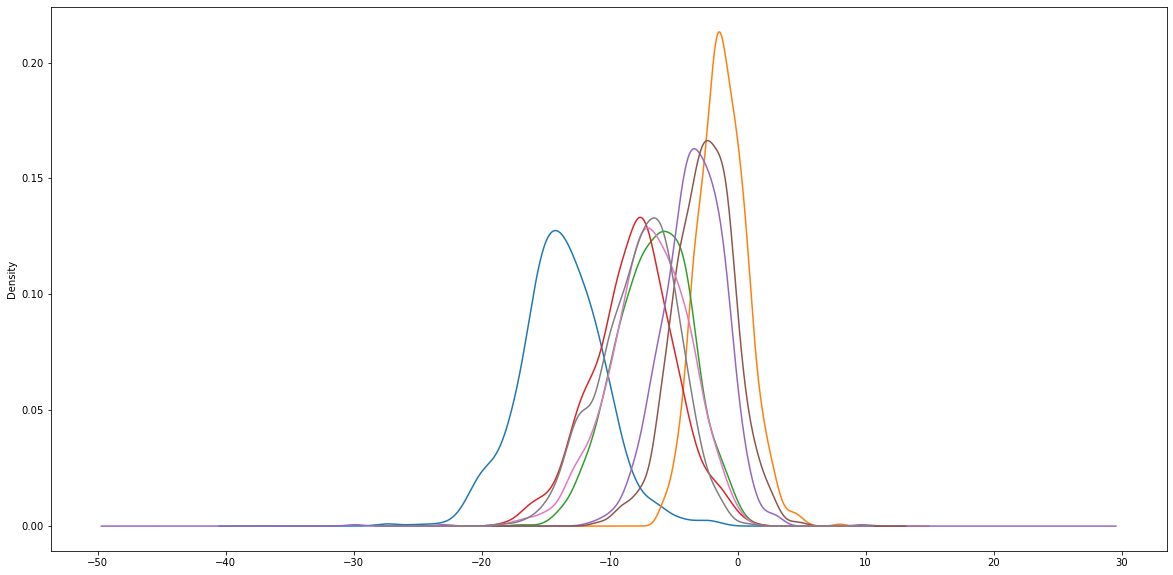

In [122]:
plt.figure(figsize=(20,10))
# df_grouped = df.groupby('Station_Lower')['Temperature()']
# df_grouped = df_grouped.filter(lambda x: x.count() > 0)
# df_grouped_count = df_grouped.count()>0
# df_grouped = df_grouped[df_grouped_count]
df_grouped.groupby('Station_Lower')['Temperature()'].plot.kde()
plt.show()

In [30]:
df[df.index.get_level_values(0).str.contains('zoraida')]

Day  Month  Day_of_Month  Lat(°C)  Lon(°C)  \
Station_Lower Year                                                  
zoraida       1987.0     0    1.0           1.0   -74.16   162.74   
              1987.0     1    1.0           2.0   -74.16   162.74   
              1987.0     2    1.0           3.0   -74.16   162.74   
              1987.0     3    1.0           4.0   -74.16   162.74   
              1987.0     4    1.0           5.0   -74.16   162.74   
...                    ...    ...           ...      ...      ...   
              NaN     1297    1.0           NaN   -74.16   162.74   
              NaN     1298    1.0           NaN   -74.16   162.74   
              NaN     1299    1.0           NaN   -74.16   162.74   
              NaN     1300    1.0           NaN   -74.16   162.74   
              NaN     1301    1.0           NaN   -74.16   162.74   

                      Elevation(m) Institution  Temperature()  
Station_Lower Year                                             
zoraida       1987.0         880.0        PNRA            NaN  
              1987.0         880.0        PNRA            NaN  
              1987.0         880.0        PNRA            NaN  
              1987.0         880.0        PNRA            NaN  
              1987.0         880.0        PNRA            NaN  
...                            ...         ...            ...  
              NaN            880.0        PNRA            NaN  
              NaN            880.0        PNRA            NaN  
              NaN            880.0        PNRA            NaN  
              NaN            880.0        PNRA            NaN  
              NaN            880.0        PNRA            NaN  

[1302 rows x 8 columns]

In [29]:
df.index.get_level_values(0).str.contains('zoraida')

array([False, False, False, ...,  True,  True,  True])

In [25]:
df.index.contains('zor')

AttributeError: 'MultiIndex' object has no attribute 'contains'

In [20]:
df['Station_Lower']=='zoraida'

KeyError: 'Station_Lower'

In [5]:
ds.isel(Day=1)

<xarray.Dataset>
Dimensions:        (Station_Lower: 216)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
    Month          float64 1.0
    Day            int64 1
    Year           (Station_Lower) float64 ...
    Day_of_Month   (Station_Lower) float64 ...
    Lat(°C)        (Station_Lower) float64 -68.41 -68.41 ... -69.37 -74.16
    Lon(°C)        (Station_Lower) float64 112.2 112.2 112.2 ... 76.38 162.7
    Elevation(m)   (Station_Lower) float64 1.622e+03 1.622e+03 ... 18.0 880.0
    Institution    (Station_Lower) object 'AAD' 'AAD' 'AAD' ... 'CHINARE' 'PNRA'
Data variables:
    Temperature()  (Station_Lower) float64 ...

In [63]:
ds.stack(z=("Station_Lower", "Year"))

KeyError: 'Year'

In [69]:
ds.groupby('Station_Lower')['a028'].groupby('Year').count()

<xarray.Dataset>
Dimensions:        (Year: 1)
Coordinates:
    Station_Lower  <U4 'a028'
    Month          float64 1.0
    Lat(°C)        float64 -68.41
    Lon(°C)        float64 112.2
    Elevation(m)   float64 1.622e+03
    Institution    object 'AAD'
  * Year           (Year) float64 1.986e+03
Data variables:
    Temperature()  (Year) int64 30

In [60]:
ds.groupby('Station_Lower',squeeze=False).count()

<xarray.Dataset>
Dimensions:        (Station_Lower: 216, Day: 1302)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
    Month          float64 1.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Lat(°C)        (Station_Lower) float64 -68.41 -68.41 ... -69.37 -74.16
    Lon(°C)        (Station_Lower) float64 112.2 112.2 112.2 ... 76.38 162.7
    Elevation(m)   (Station_Lower) float64 1.622e+03 1.622e+03 ... 18.0 880.0
    Institution    (Station_Lower) object 'AAD' 'AAD' 'AAD' ... 'CHINARE' 'PNRA'
Data variables:
    Temperature()  (Station_Lower, Day) int64 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0

In [46]:
import numpy as np

In [47]:
ds = xr.Dataset(
    {"foo": (("x", "y"), np.random.rand(4, 3))},
    coords={"x": [10, 20, 30, 40], "letters": ("x", list("abba"))},
)

In [52]:
def test(x):
    return x.count()

In [54]:
ds

<xarray.Dataset>
Dimensions:  (x: 4, y: 3)
Coordinates:
  * x        (x) int64 10 20 30 40
    letters  (x) <U1 'a' 'b' 'b' 'a'
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.2385 0.3103 0.756 ... 0.1363 0.03766 0.09508

In [53]:
ds.groupby("letters").map(test)

<xarray.Dataset>
Dimensions:  (letters: 2)
Coordinates:
  * letters  (letters) object 'a' 'b'
Data variables:
    foo      (letters) int64 6 6

In [48]:
ds

<xarray.Dataset>
Dimensions:  (x: 4, y: 3)
Coordinates:
  * x        (x) int64 10 20 30 40
    letters  (x) <U1 'a' 'b' 'b' 'a'
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.2385 0.3103 0.756 ... 0.1363 0.03766 0.09508

In [44]:
ds.mean('Year')

ValueError: Dataset does not contain the dimensions: ['Year']

In [42]:
ds.groupby('Year').mean(dim='Day')

ValueError: cannot reduce over dimensions ['Day']. expected either '...' to reduce over all dimensions or one or more of Frozen({'stacked_Station_Lower_Day': 86}).

In [36]:
ds.count('Day')

<xarray.Dataset>
Dimensions:        (Station_Lower: 216)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
    Month          float64 1.0
    Lat(°C)        (Station_Lower) float64 -68.41 -68.41 ... -69.37 -74.16
    Lon(°C)        (Station_Lower) float64 112.2 112.2 112.2 ... 76.38 162.7
    Elevation(m)   (Station_Lower) float64 1.622e+03 1.622e+03 ... 18.0 880.0
    Institution    (Station_Lower) object 'AAD' 'AAD' 'AAD' ... 'CHINARE' 'PNRA'
Data variables:
    Temperature()  (Station_Lower) int64 30 117 215 278 12 ... 58 160 961 971

In [29]:
ds.stack(new=["Year","Station_Lower"])

KeyError: 'Year'

In [24]:
ds.groupby(["Station_Lower","Year"]).count()

TypeError: `squeeze` must be True or False, but Year was supplied

In [31]:
ds.groupby("Year").count('Station_Lower')

ValueError: cannot reduce over dimensions ['Station_Lower']. expected either '...' to reduce over all dimensions or one or more of Frozen({'stacked_Station_Lower_Day': 86}).

In [6]:
ds.set_coords(("Year", "Day_of_Month"))

<xarray.Dataset>
Dimensions:        (Station_Lower: 216, Month: 12, Day: 1302)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Month          (Month) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Year           (Station_Lower, Month, Day) float64 ...
    Day_of_Month   (Station_Lower, Month, Day) float64 ...
    Lat(°C)        (Station_Lower, Month) float64 -68.41 -68.41 ... -74.16
    Lon(°C)        (Station_Lower, Month) float64 112.2 112.2 ... 162.7 162.7
    Elevation(m)   (Station_Lower, Month) float64 1.622e+03 1.622e+03 ... 880.0
    Institution    (Station_Lower, Month) object 'AAD' 'AAD' ... 'PNRA' 'PNRA'
Data variables:
    Temperature()  (Station_Lower, Month, Day) float64 ...

In [5]:
ds['Temperature()']

<xarray.DataArray 'Temperature()' (Station_Lower: 216, Month: 12, Day: 1302)>
[3374784 values with dtype=float64]
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Month          (Month) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Lat(°C)        (Station_Lower, Month) float64 -68.41 -68.41 ... -74.16
    Lon(°C)        (Station_Lower, Month) float64 112.2 112.2 ... 162.7 162.7
    Elevation(m)   (Station_Lower, Month) float64 1.622e+03 1.622e+03 ... 880.0
    Institution    (Station_Lower, Month) object 'AAD' 'AAD' ... 'PNRA' 'PNRA'

In [4]:
ds['Temperature()'].plot(x='Station

<xarray.DataArray 'Temperature()' (Station_Lower: 216, Month: 12, Day: 1302)>
[3374784 values with dtype=float64]
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Month          (Month) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Lat(°C)        (Station_Lower, Month) float64 -68.41 -68.41 ... -74.16
    Lon(°C)        (Station_Lower, Month) float64 112.2 112.2 ... 162.7 162.7
    Elevation(m)   (Station_Lower, Month) float64 1.622e+03 1.622e+03 ... 880.0
    Institution    (Station_Lower, Month) object 'AAD' 'AAD' ... 'PNRA' 'PNRA'